<a href="https://colab.research.google.com/github/HamzaSa1t/Homes-Rents-Prediction---Linear-Regression/blob/main/Auto_MPG_Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# width control
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# data upload
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
df = pd.read_csv("https://raw.githubusercontent.com/HamzaSa1t/Homes-Rents-Prediction---Linear-Regression/main/auto_mpg.csv")
df['Car Name'] = df['Car Name'].astype(str)

# 1 split: train-test
test_size_ratio = 0.2
df_train, df_test = train_test_split(df, test_size=test_size_ratio, random_state=42)
print(f"Number of training rows after split:  {len(df_train)}")

# 2. imputing "Horsepower" colmun with the mean

# turn values to num
df_train['Horsepower'] = pd.to_numeric(df_train['Horsepower'], errors='coerce')
df_test['Horsepower'] = pd.to_numeric(df_test['Horsepower'], errors='coerce')

#calculate mean for: 4 & 6 cylinders
mean_4cyl_train = df_train[df_train['Cylinders'] == 4]['Horsepower'].mean()
mean_6cyl_train = df_train[df_train['Cylinders'] == 6]['Horsepower'].mean()

print(f"\n avarage hoursepower of 4 cylinders: {mean_4cyl_train:.2f}")
print(f"avarage hoursepower of 6 cylinders: {mean_6cyl_train:.2f}")

# 3 train imputation
df_train.loc[(df_train['Cylinders'] == 4) & (df_train['Horsepower'].isna()), 'Horsepower'] = mean_4cyl_train
df_train.loc[(df_train['Cylinders'] == 6) & (df_train['Horsepower'].isna()), 'Horsepower'] = mean_6cyl_train

# 4 test Imputation
df_test.loc[(df_test['Cylinders'] == 4) & (df_test['Horsepower'].isna()), 'Horsepower'] = mean_4cyl_train
df_test.loc[(df_test['Cylinders'] == 6) & (df_test['Horsepower'].isna()), 'Horsepower'] = mean_6cyl_train


print("\n Current number of missing values in training set")
print(df_train['Horsepower'].isna().sum())
print("Current number of missing values in testing set")
print(df_test['Horsepower'].isna().sum())

# mapping nominal coloumns
column_names_map = {1: 'US', 2: 'EU', 3: 'JP'}

# 1 mapping 'Origin'
# use get_dummies for One-Hot Encoding
origin_encoded = pd.get_dummies(df_train['Origin'])
origin_encoded = origin_encoded.rename(columns=column_names_map)

df_train = pd.concat([df_train, origin_encoded], axis=1)
df_train = df_train.drop('Origin', axis=1)


print(df_train.head())

# column_names_map = {1: 'US', 2: 'EU', 3: 'JP'}

# same but on test data
origin_encoded_test = pd.get_dummies(df_test['Origin'])
origin_encoded_test = origin_encoded_test.rename(columns=column_names_map)

df_test = pd.concat([df_test, origin_encoded_test], axis=1)
df_test = df_test.drop('Origin', axis=1)

# checking
print("\n first 5 rows after mapping")
print(df_test.head())




Number of training rows after split:  318

 avarage hoursepower of 4 cylinders: 78.08
avarage hoursepower of 6 cylinders: 100.30

 Current number of missing values in training set
0
Current number of missing values in testing set
0
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year            Car Name     US     EU     JP
3    16.0          8         304.0       150.0  3433.0          12.0          70       amc rebel sst   True  False  False
18   27.0          4          97.0        88.0  2130.0          14.5          70        datsun pl510  False  False   True
376  37.0          4          91.0        68.0  2025.0          18.2          82  mazda glc custom l  False  False   True
248  36.1          4          91.0        60.0  1800.0          16.4          78    honda civic cvcc  False  False   True
177  23.0          4         115.0        95.0  2694.0          15.0          75          audi 100ls  False   True  False

 first 5 rows after mapping
      M

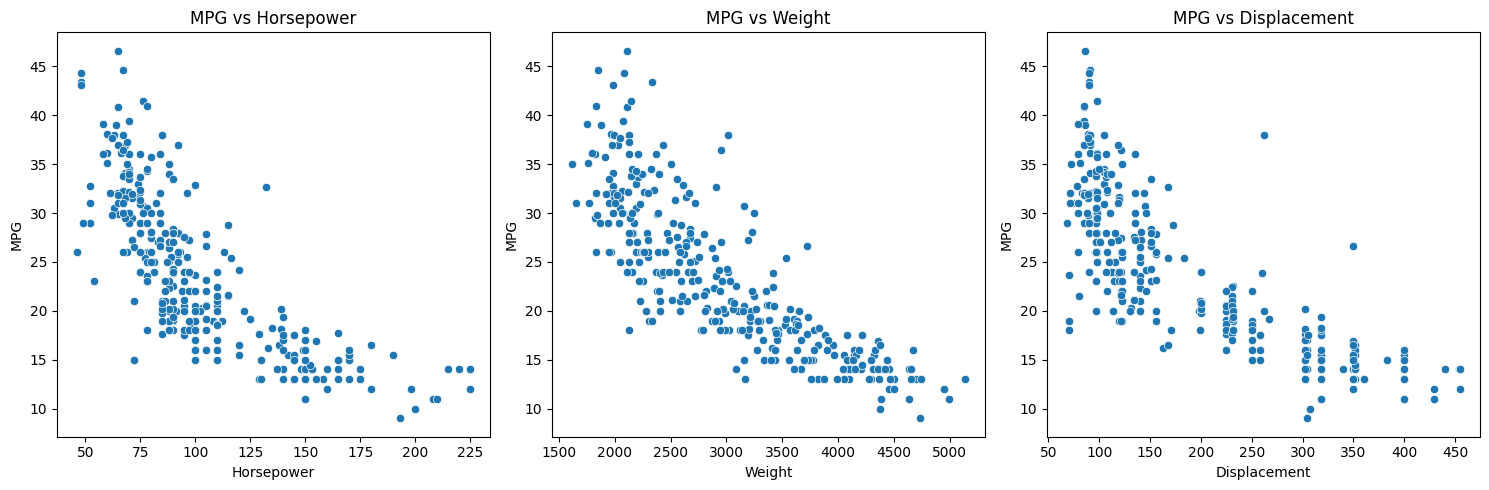

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_check = ['Horsepower', 'Weight', 'Displacement']

df_analysis = df_train.copy()

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_check):
    plt.subplot(1, 3, i + 1)

    sns.scatterplot(x=df_analysis[feature], y=df_analysis['MPG'])
    plt.title(f'MPG vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('MPG')

plt.tight_layout()
plt.show()

In [3]:
df_train['Horsepower_sq'] = df_train['Horsepower'] ** 2
df_train['Weight_sq'] = df_train['Weight'] ** 2
df_train['Displacement_sq'] = df_train['Displacement'] ** 2

df_test['Horsepower_sq'] = df_test['Horsepower'] ** 2
df_test['Weight_sq'] = df_test['Weight'] ** 2
df_test['Displacement_sq'] = df_test['Displacement'] ** 2

In [4]:
# 1 mapping 'Cylinders'

cylinders_encoded_train = pd.get_dummies(df_train['Cylinders'], prefix='Cylinders')
df_train = pd.concat([df_train, cylinders_encoded_train], axis=1)
df_train = df_train.drop('Cylinders', axis=1)

cylinders_encoded_test = pd.get_dummies(df_test['Cylinders'], prefix='Cylinders')
df_test = pd.concat([df_test, cylinders_encoded_test], axis=1)
df_test = df_test.drop('Cylinders', axis=1)

# 1 mapping ''Model Year''

year_encoded_train = pd.get_dummies(df_train['Model Year'], prefix='Year')
df_train = pd.concat([df_train, year_encoded_train], axis=1)
df_train = df_train.drop('Model Year', axis=1)

year_encoded_test = pd.get_dummies(df_test['Model Year'], prefix='Year')
df_test = pd.concat([df_test, year_encoded_test], axis=1)
df_test = df_test.drop('Model Year', axis=1)

# add missing coloumns in df_test: to make both datasets symmetrical
df_test['Cylinders_3'] = 0
df_test['Cylinders_5'] = 0

# 2 use same coloumns order
df_test = df_test[df_train.columns]

print(df_train.head())


      MPG  Displacement  Horsepower  Weight  Acceleration            Car Name     US     EU     JP  Horsepower_sq   Weight_sq  Displacement_sq  Cylinders_3  Cylinders_4  Cylinders_5  Cylinders_6  Cylinders_8  Year_70  Year_71  Year_72  Year_73  Year_74  Year_75  Year_76  Year_77  Year_78  Year_79  Year_80  Year_81  Year_82
3    16.0         304.0       150.0  3433.0          12.0       amc rebel sst   True  False  False        22500.0  11785489.0          92416.0        False        False        False        False         True     True    False    False    False    False    False    False    False    False    False    False    False    False
18   27.0          97.0        88.0  2130.0          14.5        datsun pl510  False  False   True         7744.0   4536900.0           9409.0        False         True        False        False        False     True    False    False    False    False    False    False    False    False    False    False    False    False
376  37.0          91.0  

In [5]:
features_to_scale = [
    'Displacement', 'Horsepower', 'Weight', 'Acceleration',
    'Horsepower_sq', 'Weight_sq', 'Displacement_sq'
]

scaler = StandardScaler()

scaler.fit(df_train[features_to_scale].values)

df_train[features_to_scale] = scaler.transform(df_train[features_to_scale].values)
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale].values)

print("Scaling done")

Scaling done


In [6]:
# 2. Selecting x, y for training & testing (features and labels)

X_train = df_train.drop(['MPG', 'Car Name'], axis=1)
Y_train = df_train['MPG']

X_test = df_test.drop(['MPG', 'Car Name'], axis=1)
Y_test = df_test['MPG']

print(f"number of training features of (X_train): {X_train.shape[1]}")
print(df_train.head())


number of training features of (X_train): 28
      MPG  Displacement  Horsepower    Weight  Acceleration            Car Name     US     EU     JP  Horsepower_sq  Weight_sq  Displacement_sq  Cylinders_3  Cylinders_4  Cylinders_5  Cylinders_6  Cylinders_8  Year_70  Year_71  Year_72  Year_73  Year_74  Year_75  Year_76  Year_77  Year_78  Year_79  Year_80  Year_81  Year_82
3    16.0      1.090196    1.268512  0.552826     -1.319334       amc rebel sst   True  False  False       1.128239   0.421143         0.940313        False        False        False        False         True     True    False    False    False    False    False    False    False    False    False    False    False    False
18   27.0     -0.922996   -0.400866 -0.999667     -0.413182        datsun pl510  False  False   True      -0.452089  -0.926019        -0.793553        False         True        False        False        False     True    False    False    False    False    False    False    False    False    False    F

In [7]:
# calculating predicted y values
W = np.zeros(X_train.shape[1])
b = 0
X_train_np = X_train.values

def calculate_predections(W, b, X_train_np):
  Y_predicted = np.dot(X_train_np, W) + b
  return Y_predicted

Y_predicted = calculate_predections(W, b, X_train_np)

In [8]:
# loss funtion
Y_train_np = Y_train.values

def calculte_loss(y_actual,Y_predicted):
  first = y_actual - Y_predicted
  second = np.square(first)
  last = np.mean(second)
  return last

loss = calculte_loss(Y_train_np, Y_predicted)
print(loss)


620.0422012578613


In [9]:
# gradient decent function
NUM_ITERATIONS = 5000
LEARNING_RATE = 0.1
num_instances = X_train_np.shape[0]

def gradient_decent(w, b, x, NUM_ITERATIONS, LEARNING_RATE, loss, Y_predicted, num_instances, Y_train_np):
  loss_history = []
  for i in range(NUM_ITERATIONS):

    Y_predicted = calculate_predections(w, b, x)

    loss_w = Y_predicted - Y_train_np
    w = w - ( LEARNING_RATE * ( 1 / num_instances ) * np.dot(x.T, loss_w ) )
    b =  b - ( LEARNING_RATE * ( 1 / num_instances ) *  np.sum(loss_w) )

    if i % 100 == 0:
            loss = calculte_loss(Y_train_np, Y_predicted)
            loss_history.append(loss)
            print(f"Iteration {i}: Loss = {loss:.4f}")


  return w, b, loss_history

W, b, loss_history = gradient_decent(W, b, X_train_np, NUM_ITERATIONS, LEARNING_RATE, loss, Y_predicted, num_instances, Y_train_np)
print(f"Ws equal: {W}")
print(W.shape[0])
print(f"b equal: {b}")
#print(loss_history)



Iteration 0: Loss = 620.0422
Iteration 100: Loss = 11.0054
Iteration 200: Loss = 8.6636
Iteration 300: Loss = 7.8285
Iteration 400: Loss = 7.4307
Iteration 500: Loss = 7.1984
Iteration 600: Loss = 7.0428
Iteration 700: Loss = 6.9291
Iteration 800: Loss = 6.8417
Iteration 900: Loss = 6.7723
Iteration 1000: Loss = 6.7163
Iteration 1100: Loss = 6.6705
Iteration 1200: Loss = 6.6327
Iteration 1300: Loss = 6.6013
Iteration 1400: Loss = 6.5751
Iteration 1500: Loss = 6.5532
Iteration 1600: Loss = 6.5347
Iteration 1700: Loss = 6.5190
Iteration 1800: Loss = 6.5057
Iteration 1900: Loss = 6.4944
Iteration 2000: Loss = 6.4847
Iteration 2100: Loss = 6.4764
Iteration 2200: Loss = 6.4692
Iteration 2300: Loss = 6.4630
Iteration 2400: Loss = 6.4575
Iteration 2500: Loss = 6.4528
Iteration 2600: Loss = 6.4486
Iteration 2700: Loss = 6.4449
Iteration 2800: Loss = 6.4417
Iteration 2900: Loss = 6.4387
Iteration 3000: Loss = 6.4362
Iteration 3100: Loss = 6.4338
Iteration 3200: Loss = 6.4317
Iteration 3300: Los

In [10]:
# using sklearn library to compare it to the model's performance:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred_sk = model.predict(X_test)
mse_sk = mean_squared_error(Y_test, y_pred_sk)
print(f"Scikit-learn MSE: {mse_sk:.4f}")

Scikit-learn MSE: 5.6289


In [11]:
# measuring by MSE:

X_test_np = X_test.values
Y_test_pred = np.dot(X_test_np, W) + b
test_mse = np.mean((Y_test - Y_test_pred) ** 2)
print(f"Test MSE: {test_mse:.4f}")

Test MSE: 5.5911
